2번
코로나19에 대한 나라별 데이터로 모델링 진행  
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리  
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv
컬럼  

- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

2-1) 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라  
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라  
2-2) 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화  
2-3) 한국의 코로나 확진자 예측해라(선형 시계열모델 + 비선형시계열 모델 2개 만들어라)  
누적 확진자, 누적 사망자를 Y로 두고, 모델을 만드는데 평가는 누적 확진자가 아닌 일일 확진자 or 일일 사망자로 하여라  

3번  
설문조사 데이터
데이터 출처 : 자체 제작
데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv

데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다  
3-1) 각 그룹의 영역별 응답의 평균, 표준편차, 왜도, 첨도를 구하라.  
3-2) 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라  
3-3) 탐색적 요인분석을 수행하고 결과를 시각화 하라  

## 2. 코로나19에 대한 나라별 데이터로 모델링 진행
### 2-1) 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라. 상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/data/adp/week13_기출3/problem2.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136931 entries, 0 to 136930
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   location          136931 non-null  object 
 1   date              136931 non-null  object 
 2   total_cases       129343 non-null  float64
 3   total_deaths      118074 non-null  float64
 4   new_tests         57061 non-null   float64
 5   population        135951 non-null  float64
 6   new_vaccinations  29414 non-null   float64
dtypes: float64(5), object(2)
memory usage: 7.3+ MB


In [ ]:
df2.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN


In [ ]:
## 마지막 날 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가 출력
##date를 날짜형 변수로 바꿔줌
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  This is separate from the ipykernel package so we can avoid doing imports until


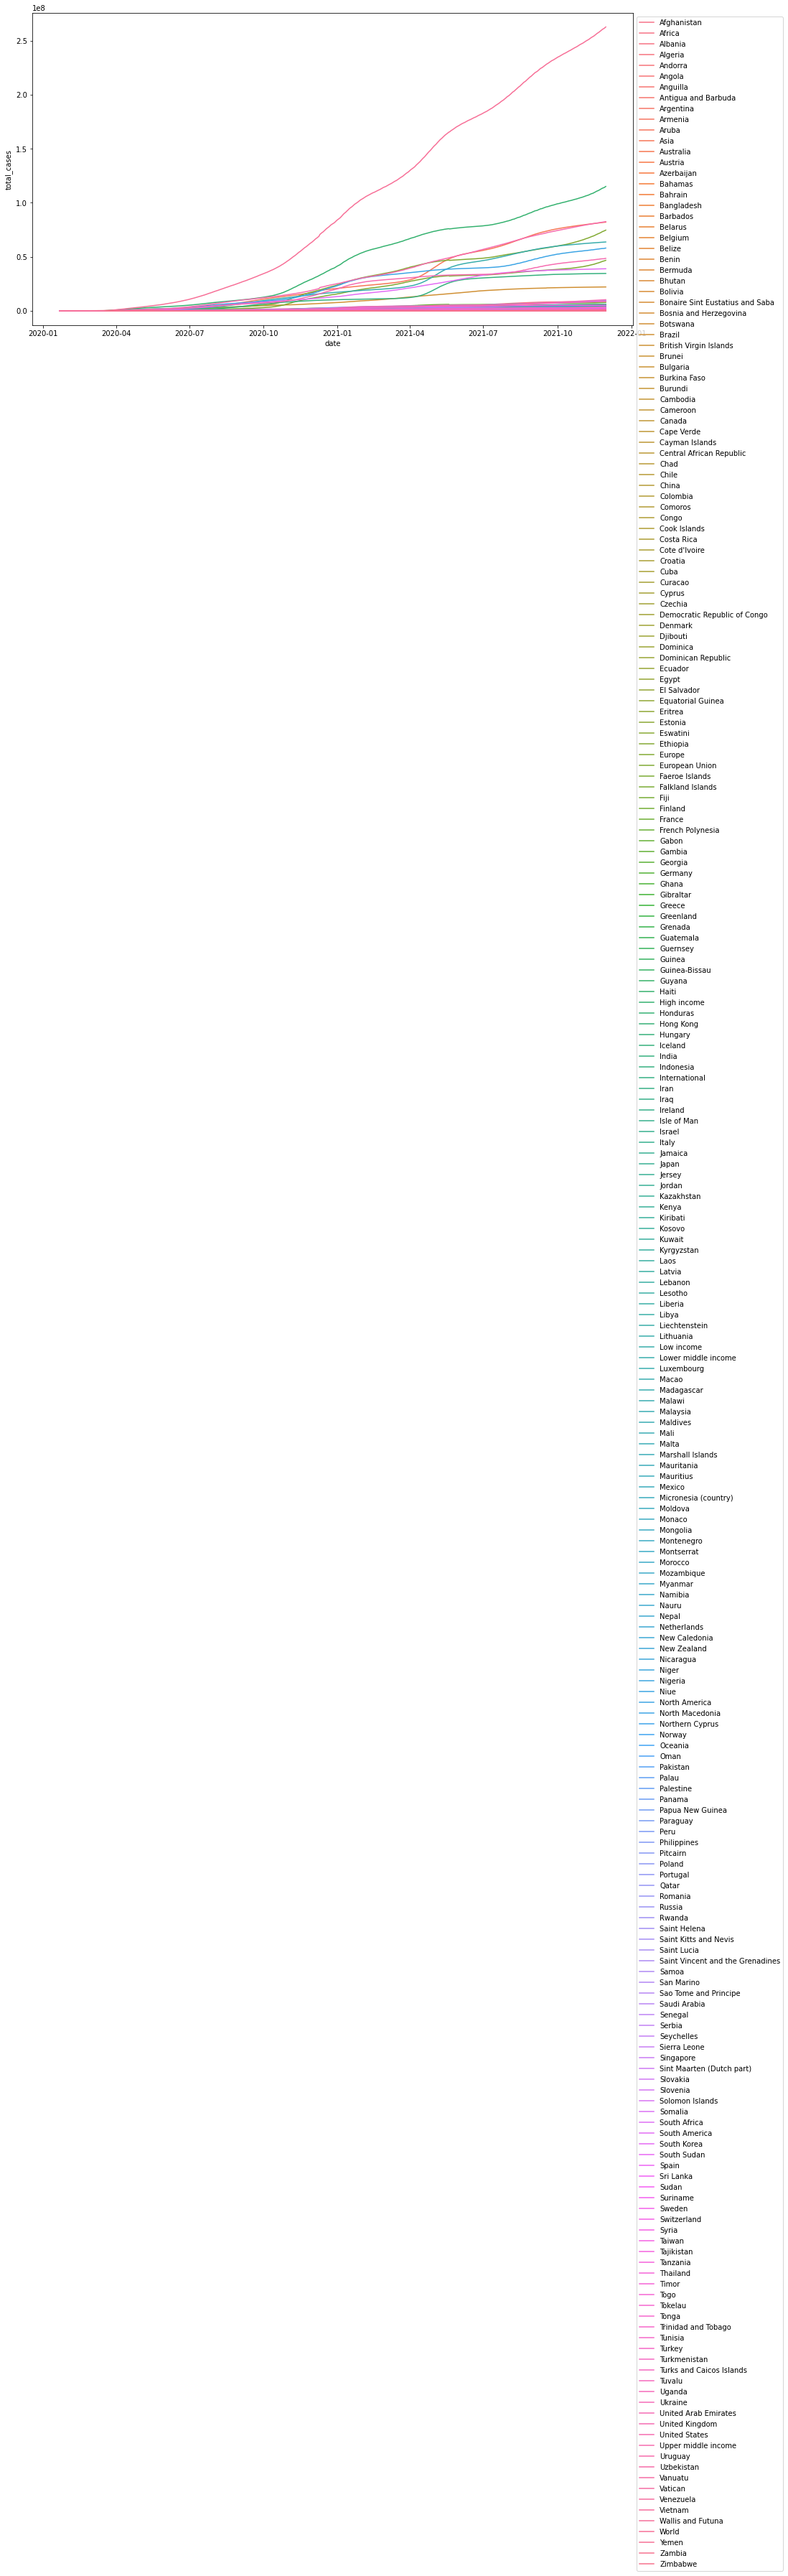

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='date', y='total_cases', hue='location', data=df2)
plt.locator_params(axis='x', nbins=10)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [ ]:
df2_1 = df2[df2['date'] == max(df2['date'])]
df2_1.nlargest(5,['total_cases'])

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
135086,World,2021-11-30,262797494.0,5215291.0,NaN,7.874966e+09,NaN
53483,High income,2021-11-30,115119076.0,1830909.0,NaN,1.214930e+09,NaN
130582,Upper middle income,2021-11-30,82564891.0,2192456.0,NaN,2.513673e+09,NaN
7044,Asia,2021-11-30,82102069.0,1218500.0,NaN,4.678445e+09,NaN
40923,Europe,2021-11-30,74697774.0,1420111.0,NaN,7.489630e+08,NaN


상위 n개의 국가를 구해야 하는데 location에 국가가 아닌 다른 범주가 포함되어 있다. 국가가 아닌 범주는 데이터에서 완전히 삭제하도록 하겠음

In [ ]:
df2_1.nlargest(20,['population']) ##대륙, 국가 외 카테고리는 개별국가보다 인구수가 많을 것이기 때문에 인구수 column이 큰 데이터를 확인

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
135086,World,2021-11-30,262797494.0,5215291.0,NaN,7.874966e+09,NaN
7044,Asia,2021-11-30,82102069.0,1218500.0,NaN,4.678445e+09,NaN
73522,Lower middle income,2021-11-30,63731411.0,1154562.0,NaN,3.330653e+09,NaN
130582,Upper middle income,2021-11-30,82564891.0,2192456.0,NaN,2.513673e+09,NaN
25907,China,2021-11-30,98901.0,4636.0,NaN,1.444216e+09,NaN
56744,India,2021-11-30,34587822.0,468980.0,NaN,1.393409e+09,NaN
1302,Africa,2021-11-30,8652562.0,222881.0,NaN,1.373486e+09,NaN
53483,High income,2021-11-30,115119076.0,1830909.0,NaN,1.214930e+09,NaN
40923,Europe,2021-11-30,74697774.0,1420111.0,NaN,7.489630e+08,NaN
72843,Low income,2021-11-30,1380503.0,37349.0,NaN,6.651490e+08,NaN


In [ ]:
del_list = ['World', 'Asia', 'Lower middle income', 'Upper middle income', 'High income', 'Europe', 'Low income', 'North America', 'European Union', 'South America']

df2.drop(df2.index[df2['location'].isin(del_list)], inplace=True)

In [ ]:
##최종적으로 인구 대비 확진자 비율 상위 5개 데이터를 출력
df2_1 = df2[df2['date'] == max(df2['date'])]
df2_1['확진자비율'] = df2_1['total_cases']/df2_1['population']
df2_1.nlargest(5,'확진자비율')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,확진자비율
83449,Montenegro,2021-11-30,157376.0,2307.0,NaN,628051.0,NaN,0.250578
108918,Seychelles,2021-11-30,23417.0,125.0,NaN,98910.0,NaN,0.236751
3231,Andorra,2021-11-30,17115.0,131.0,NaN,77354.0,NaN,0.221256
111048,Slovakia,2021-11-30,1170200.0,14418.0,NaN,5460726.0,NaN,0.214294
46158,Georgia,2021-11-30,845643.0,12054.0,NaN,3979773.0,NaN,0.212485


In [ ]:
sol_list = df2_1.nlargest(5,'확진자비율')['location'].values.tolist()

list

In [ ]:
## 상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

## 5개 국가 데이터만 뽑아내기 (전체 데이터로 볼 경우 null값이 많아서 핸들링하기 힘듦)
df2_1 = df2.iloc[df2.index[df2['location'].isin(del_list)]]

## 일일 확진자의 수/ 일일 사망자의 수 구하기
for col in sol_list:
  
  #df2['new_cases'] = df2['total_cases'].diff().fillna(df2['total_cases'].iloc[0])
  #df2['new_deaths'] = df2['total_deaths'].diff().fillna(df2['total_deaths'].iloc[0])

In [ ]:
df2.iloc[df2.index[df2['location'].isin(sol_list)]] ## 왜 맘대로 핸들링이 안될 까ㅏ..

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
2593,Andorra,2020-03-02,1.0,NaN,NaN,77354.0,NaN
2594,Andorra,2020-03-03,1.0,NaN,NaN,77354.0,NaN
2595,Andorra,2020-03-04,1.0,NaN,NaN,77354.0,NaN
2596,Andorra,2020-03-05,1.0,NaN,NaN,77354.0,NaN
2597,Andorra,2020-03-06,1.0,NaN,NaN,77354.0,NaN
...,...,...,...,...,...,...,...
116411,Sri Lanka,2021-02-16,77184.0,409.0,13585.0,21497306.0,3225.0
116412,Sri Lanka,2021-02-17,77906.0,422.0,15386.0,21497306.0,14242.0
116413,Sri Lanka,2021-02-18,78420.0,430.0,15554.0,21497306.0,23067.0
116414,Sri Lanka,2021-02-19,78937.0,433.0,15909.0,21497306.0,30307.0
